In [34]:
import spacy
import pytextrank


In [35]:
# importing required modules
import PyPDF2

In [36]:
# creating a pdf file object
pdfFileObj = open('article.pdf', 'rb')
  
# creating a pdf reader object
pdfReader = PyPDF2.PdfReader(pdfFileObj)

In [37]:
# printing number of pages in pdf file
print(len(pdfReader.pages))
  
text = ' '.join([pdfReader.pages[i].extract_text() for i in range(len(pdfReader.pages))])
  
# closing the pdf file object
pdfFileObj.close()

30


In [38]:
text = text.replace('\n',' ')

In [39]:
text[500:1000]

'India, Maldives, Pakistan and Sri Lanka, habitats a significant part of the world  population, and is emerging as a major knowledge producer. These South Asian countries  are not only connected through shared history, language and culture, but also through an  intergovernmental organization called South Asian Association for Regional Cooperation  (SAARC). This article attempts to measure and characterize the research collaboration  in the SAARC countries during 2001–2019. The research publicatio'

In [40]:
# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")
# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")
doc = nlp(text)
# examine the top-ranked phrases in the document
for phrase in doc._.phrases[:10]:
    print(phrase.text)

/home/sandeepchatterjee/.local/lib/python3.9/site-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Research collaboration
research collaboration
research collaborations
collaborated research papers
higher research collaboration
research papers
intra-collaborated research papers
inter-collaborated research papers
Research collaboration patterns
research collaboration levels


In [43]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

In [44]:
all_headlines = """
Measuring and characterizing research collaboration in SAARC countries
"""

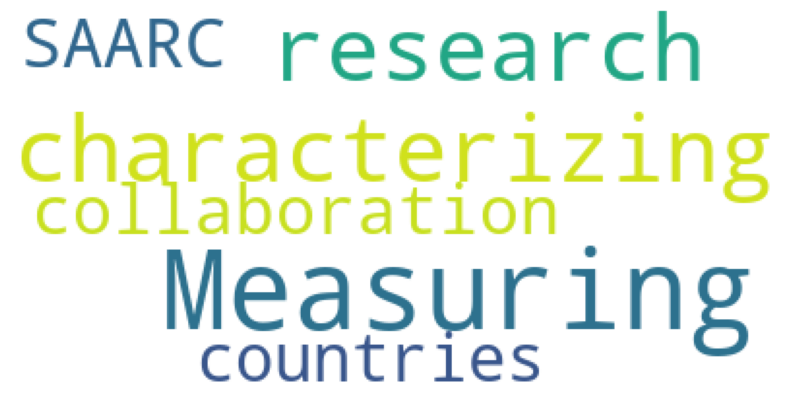

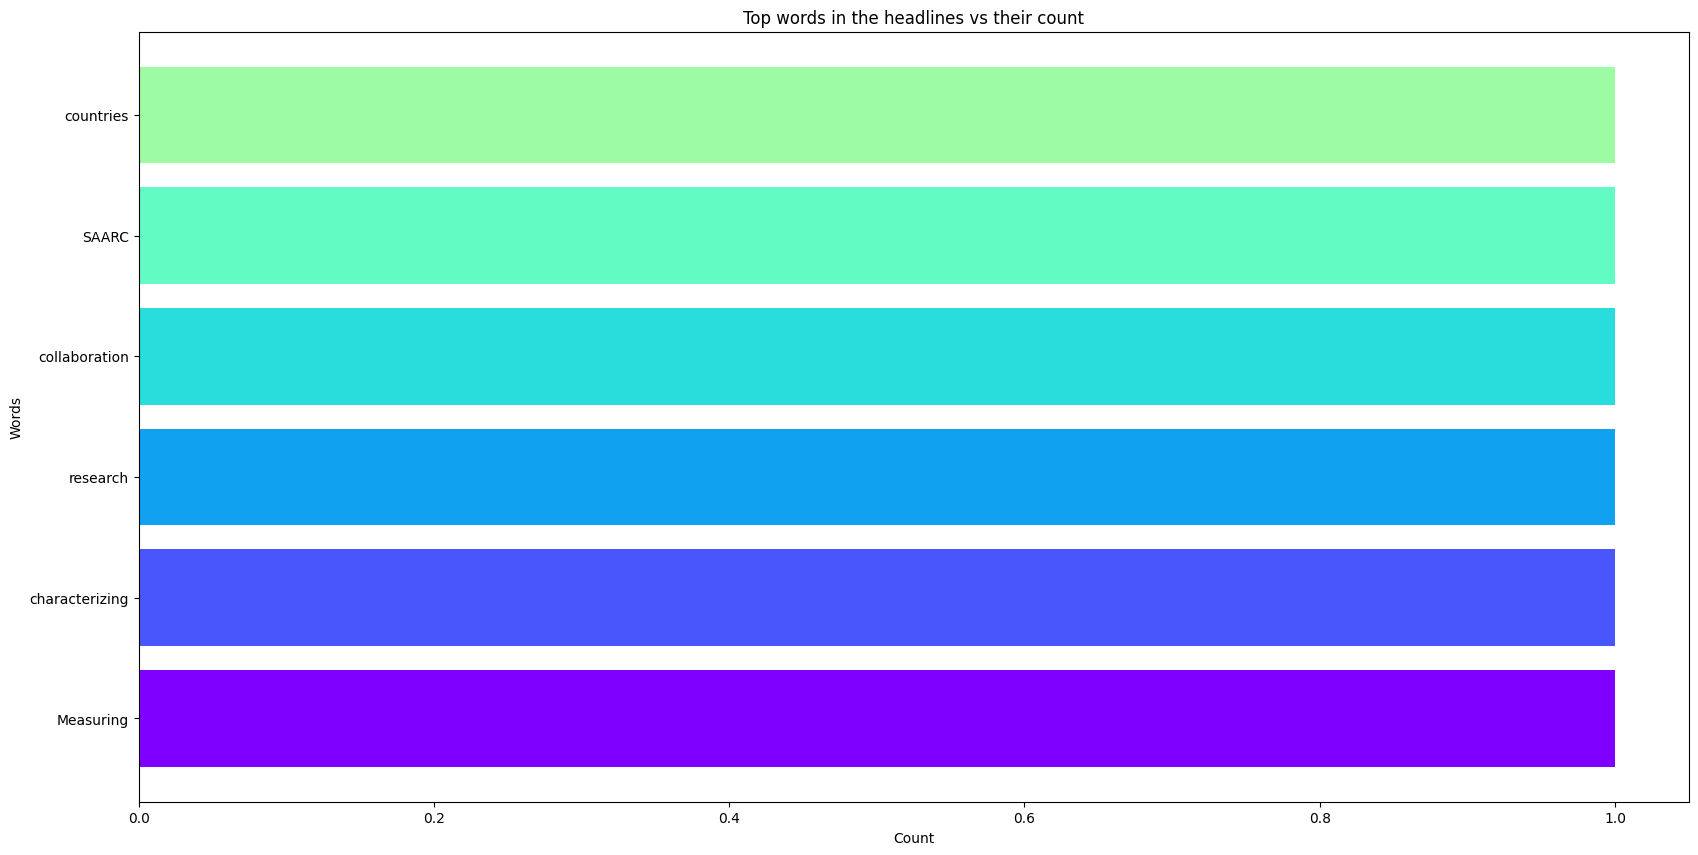

In [45]:
stopwords = STOPWORDS
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_headlines)
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
filtered_words = [word for word in all_headlines.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)
plt.show()